<a href="https://colab.research.google.com/github/adhello007/ML-Projects/blob/main/RealImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here the assumption is that there is a zip folder called dogs.zip and cats.zip on your google drive and not inside any folder. secondly there is no DogNCat folder preexisting. thats all 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import os 


In [ ]:
data_dir = 'data/'
if not os.path.isdir(data_dir):
  os.mkdir(data_dir)

In [ ]:
#By default when you load-in a dataset, its going to expand and use all the 
#ram available on your system. so the following code helps prevent this and 
#prevents something called OOM (out of memory) error.
gpus = tf.config.experimental.list_physical_devices('GPU')  #gpus var now has 
#all the gpus available on your system. 
for gpu in gpus: 
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
#upload the zip file of the folder to drive, then mount drive in the pwd. 
#now change the pwd, download and extract the folder 

from google.colab import drive 
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.mkdir('data/MyDrive/DogNCat') #made a folder which will have the dog and cat pics 

In [ ]:
os.chdir('/content/data/MyDrive') 

In [ ]:
!unzip dogs.zip

Archive:  dogs.zip
  inflating: dogs/_124800859_gettyimages-817514614.jpg  
  inflating: dogs/_82377964_dog4thinkstock.jpg  
  inflating: dogs/01-german-shepherd-coronavirus-bwtkdt_square.jpg  
  inflating: dogs/03.-German-shepherd.jpg  
  inflating: dogs/03-june_puppies.jpg  
  inflating: dogs/04TB-DOGS-mobileMasterAt3x.jpg  
  inflating: dogs/0-570x380.jpg      
  inflating: dogs/07_169.jpg         
  inflating: dogs/077c1e70-a086-11ed-8f65-71bfa0525ce3.jpg  
  inflating: dogs/0LFS-oAro8b1qmeH9.jpg  
  inflating: dogs/1_dog.jpg          
  inflating: dogs/1_dog-on-beach.jpg  
  inflating: dogs/113.jpg            
  inflating: dogs/1155875.jpg        
  inflating: dogs/11-dogs-like-german-shepherd.png  
  inflating: dogs/1200px-10_yr_old_Mastiff.JPG.jpg  
  inflating: dogs/1215662813_ab44b408c9_o.width-2500.jpg  
  inflating: dogs/150px-Tuxedomix2.jpg  
  inflating: dogs/1664175609_beagle13.jpg  
  inflating: dogs/1669274485_1652448249_New-Beagle-Puppies-32.jpg  
  inflating: dogs/17D

In [ ]:
!unzip cats.zip

Archive:  cats.zip
  inflating: cats/00tb-cats1-mediumSquareAt3X.jpg  
  inflating: cats/07CAT-STRIPES-mediumSquareAt3X-v2.jpg  
  inflating: cats/1_5978274.jpg      
  inflating: cats/10-Best-Names-For-Gray-Cats.jpg  
  inflating: cats/1122InsideCats.png  
  inflating: cats/1177177-cat-at-home-banner_990x350.jpg  
  inflating: cats/1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg  
  inflating: cats/140372563.jpg      
  inflating: cats/14-Fun-Facts-about-CatsTEASER.jpg  
  inflating: cats/1521-WIRED-Cat.jpeg  
  inflating: cats/19451063_1006.jpg  
  inflating: cats/20230322195741.png  
  inflating: cats/203831.jpg         
  inflating: cats/210429_MLRC_Akash_Jaya-on-log-copy.jpg  
  inflating: cats/220726-cat-theo-elise-ew-636p-6cd3b0.jpg  
  inflating: cats/220805-domestic-cat-mjf-1540-382ba2.jpg  
  inflating: cats/320572-340x219-oriental-grey.jpg  
  inflating: cats/5a0420c80195a039a74309d2b710cf33.jpg  
  inflating: cats/63bcd4029250da289a141aa9f7ca8e6e.jpg  
  infla

Remove Corrupted/Weird Images 


In [ ]:
image_exts = ['jpeg','jpg','bmp','png'] #created a list of image extensions needed


In [ ]:
import cv2 
import imghdr 
data_dir = '/content/data/MyDrive/DogNCat'

In [ ]:
#First we move the extracted files from mydrive to dogncat folder
import shutil 
shutil.move("/content/data/MyDrive/dogs", data_dir)
shutil.move("/content/data/MyDrive/cats", data_dir)

'/content/data/MyDrive/DogNCat/cats'

In [ ]:
for image_class in os.listdir(data_dir): #loop for going thru folders in data_dir
  for image in os.listdir(os.path.join(data_dir,image_class)): #for every image in a folder
    image_path = os.path.join(data_dir,image_class,image) #storing img path
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path) #this finds the image_path's type of image.
      if tip not in image_exts:
        print('image not in extension list {}'.format(image_path))
        os.remove(image_path) #removes that image
    except Exception as e:
      print('issue with image {}'.format(image_path))
        

image not in extension list /content/data/MyDrive/DogNCat/dogs/113.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/150px-Tuxedomix2.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/1664175609_beagle13.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/1-year-old-beagle-HP-long.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/311.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/410.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/4ae76fa8c9910485045e4f9a956345903b-18-puppy-dog-eyes.rsquare.w700.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/640px-Golde33443.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/7.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/8160-004-991E073E.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/81778518.jpg
image not in extension list /content/data/MyDrive/DogNCat/dogs/beagle-dog-br

In [ ]:
os.listdir(data_dir)

['dogs', 'cats']

 **Lets Build a Data-Pipeline**

we will import a keras library that will build a  dataset for you. its a dataset generator. it analyses classes and images and creates a dataset. 

keras has a data pipeline function which builds a dataset for you 
from the given images. it resizes the images, it creates a validation split 
it will shuffle them ....etc. 


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data/MyDrive/DogNCat')

Found 901 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator() #allows us to access the data generator

In [ ]:
batch = data_iterator.next() #allows us to pull a batch of 32 images 

In [ ]:
len(batch) #basically a batch of images and labels in a numpy form

2

In [ ]:
batch[0].shape #has images

(32, 256, 256, 3)

In [ ]:
batch[1] #has the labels of those imagges 

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

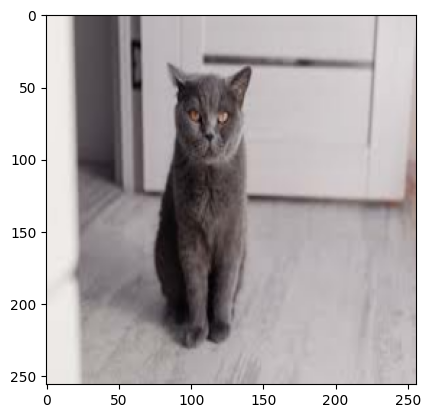

In [ ]:
plt.imshow(batch[0][5].astype(int))

In [ ]:
batch[1][5] #so 0 is for cat and 1 is for dog 

0

PreProcessing The Data

we'll normalize the numpy array and we dont wanna pull  a batch of images and normalize them everytime. 

we wanna do it while we're loading the data pipeline so that we can normalize them all at once. 


In [ ]:
data = data.map(lambda x,y:(x/255.,y))

In [ ]:
data.as_numpy_iterator().next() #this takes a batch of images. standard size is 32

(array([[[[0.22352941, 0.39607844, 0.39019608],
          [0.12156863, 0.38627452, 0.35882354],
          [0.12941177, 0.3882353 , 0.38039216],
          ...,
          [0.        , 0.24313726, 0.3019608 ],
          [0.00392157, 0.23529412, 0.29803923],
          [0.00392157, 0.23529412, 0.29803923]],
 
         [[0.22352941, 0.39411765, 0.39803922],
          [0.12156863, 0.38431373, 0.36666667],
          [0.1254902 , 0.38431373, 0.3764706 ],
          ...,
          [0.        , 0.24705882, 0.30588236],
          [0.00392157, 0.23529412, 0.29803923],
          [0.00392157, 0.23529412, 0.29803923]],
 
         [[0.22352941, 0.39411765, 0.39803922],
          [0.12156863, 0.38431373, 0.36666667],
          [0.13333334, 0.39215687, 0.38431373],
          ...,
          [0.        , 0.24705882, 0.30588236],
          [0.00392157, 0.23529412, 0.29803923],
          [0.00392157, 0.23529412, 0.29803923]],
 
         ...,
 
         [[0.4862745 , 0.5254902 , 0.24313726],
          [0.48823

In [ ]:
batch = data.as_numpy_iterator().next() #gave a variable

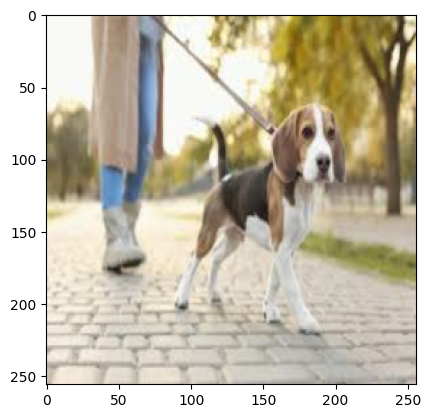

In [ ]:
plt.imshow(batch[0][5])

In [ ]:
len(data) #now we'll see how many batches are there in the dataset made by the library

29

In [ ]:
#we'll split them now into training , val , test 
train = data.take(21)
val = data.take(6)
test = data.take(2)


In [ ]:
type(train)

tensorflow.python.data.ops.take_op._TakeDataset

**Create a MOdel**

Here, we're using transfer learning and we'll use vgg16. 

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D , Dense, Flatten, Dropout , BatchNormalization
from keras.applications.vgg16 import preprocess_input

from keras.applications import VGG16
vgg_conv = VGG16(weights="imagenet",include_top=False,input_shape =(256,256,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg_conv.layers: 
  layer.trainable = False

In [ ]:
model = Sequential()

model.add(vgg_conv) #add the vgg16 model to our model. 

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [ ]:
from keras.optimizers import Adam 
opt = Adam(learning_rate = 0.001,beta_1=0.9,beta_2=0.99,amsgrad=False)

model.compile(
    optimizer= opt, 
    loss = "BinaryCrossentropy",
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [ ]:
training = model.fit(train, epochs=10,validation_data =val)

Epoch 1/10
21/21 [==============================] - 17s 636ms/step - loss: 0.7826 - accuracy: 0.6414 - val_loss: 0.5398 - val_accuracy: 0.7448
Epoch 2/10
21/21 [==============================] - 21s 858ms/step - loss: 0.3985 - accuracy: 0.8482 - val_loss: 0.3207 - val_accuracy: 0.8281
Epoch 3/10
21/21 [==============================] - 16s 667ms/step - loss: 0.2523 - accuracy: 0.8958 - val_loss: 0.1747 - val_accuracy: 0.9115
Epoch 4/10
21/21 [==============================] - 16s 640ms/step - loss: 0.1700 - accuracy: 0.9241 - val_loss: 0.0519 - val_accuracy: 0.9896
Epoch 5/10
21/21 [==============================] - 17s 675ms/step - loss: 0.1029 - accuracy: 0.9643 - val_loss: 0.0936 - val_accuracy: 0.9583
Epoch 6/10
21/21 [==============================] - 16s 620ms/step - loss: 0.0776 - accuracy: 0.9717 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 16s 648ms/step - loss: 0.0301 - accuracy: 0.9940 - val_loss: 0.0046 - val_accuracy: 1.0000

In [ ]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

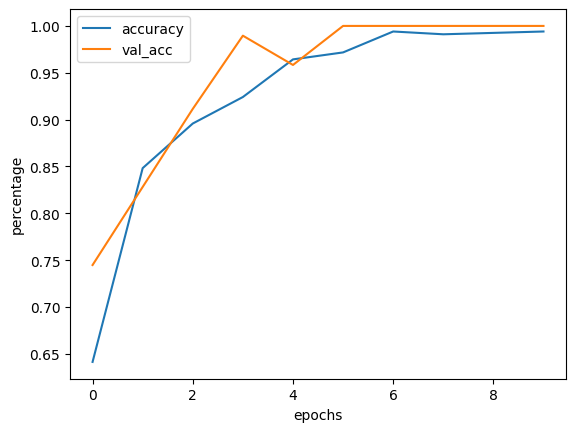

In [ ]:
accuracy = training.history['accuracy']
val_acc  = training.history['val_accuracy']
plt.plot(range(len(accuracy)),accuracy,label = "accuracy")
plt.plot(range(len(accuracy)),val_acc,label ="val_acc")
plt.xlabel('epochs')
plt.ylabel('percentage')
plt.legend()
plt.show()

Model Evaluation time 


In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch 
  y_pred = model.predict(x)
  pre.update_state(y,y_pred)
  re.update_state(y,y_pred)
  acc.update_state(y,y_pred)

1/1 [==============================] - 0s 45ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


In [ ]:
y_pred =  np.round(y_pred)

In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

Text(95.72222222222221, 0.5, 'Ground Truth')

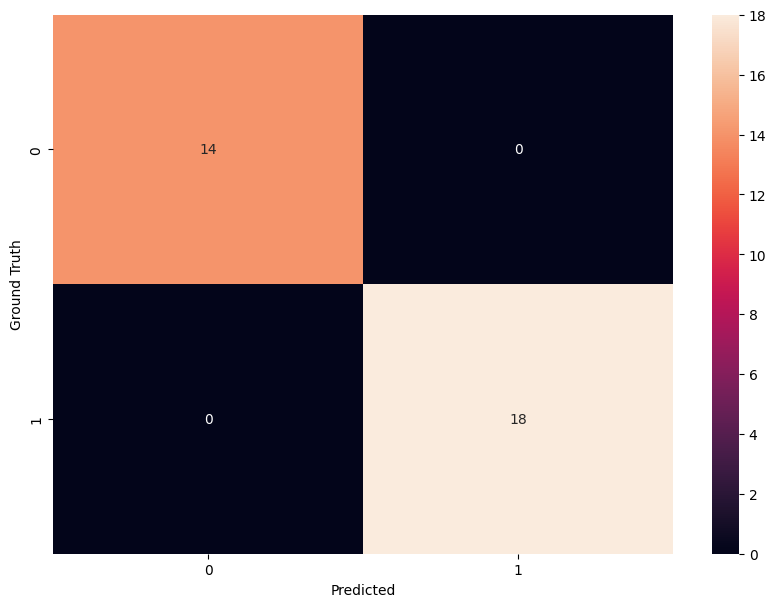

In [ ]:
import seaborn as sns 

cm = tf.math.confusion_matrix(labels=y,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

Now we'll download an image from google, upload it to drive and test if our model works 


In [ ]:
os.getcwd()

'/content/data/MyDrive'

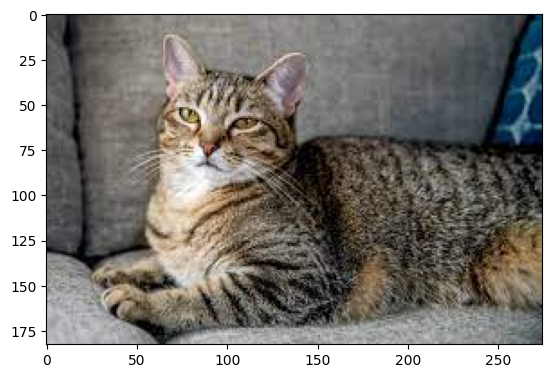

In [111]:
img = cv2.imread('catimg.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


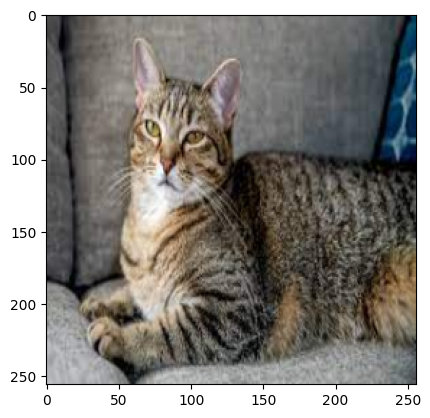

In [112]:
#Lets resize it 

resize = tf.image.resize(img,(256,256))
bgr_img = resize.numpy().astype(int)
bgr_img = bgr_img.astype(np.uint8)

rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [113]:
rgb_img = rgb_img / 255.

our model expects a batch of images and not a single image. so we'll put this image in a list 

In [114]:
batch1 = np.expand_dims(rgb_img,0)

In [115]:
y_hat = model.predict(batch1)

1/1 [==============================] - 0s 23ms/step


In [116]:
y_hat = np.round(y_hat)

In [117]:
y_hat

array([[0.]], dtype=float32)